# Import

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 159kB/s 
     |████████████████████████████████| 6.8MB 33.8MB/s 
     |████████████████████████████████| 983kB 39.1MB/s 
     |████████████████████████████████| 266kB 37.7MB/s 
     |████████████████████████████████| 1.9MB 33.3MB/s 
     |████████████████████████████████| 1.2MB 36.7MB/s 
     |████████████████████████████████| 471kB 35.3MB/s 
     |████████████████████████████████| 901kB 37.6MB/s 
     |████████████████████████████████| 3.3MB 25.1MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=6a80124cabe966b30a2c60cf2b5004ac568ce27e3c56c06061dbe735955b404e
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=1220a8740d930fc1cfae5286846b3e0c924eeadfc549f8f47d06a0cb2ed00eb1
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import ktrain
from ktrain import text

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, hamming_loss


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Capstone - Multi Label Classification on Research Articles/datasets/train_cleaned.csv')
#train = pd.read_csv('./datasets/train_cleaned.csv')

In [ ]:
train_df, test_df = train_test_split(train, test_size = 0.2, random_state=42)

# **Model**

In [ ]:
classes = ['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']

In [ ]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df=train_df,
                                                                  text_column='merged',
                                                                  label_columns=classes,
                                                                  val_df=test_df,
                                                                  maxlen=320,
                                                                  preprocess_mode='standard',
                                                                  ngram_range=1,
                                                                  random_state=42,
                                                                  verbose=1,
                                                                  )

['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
       Computer Science  Physics  ...  Quantitative Biology  Quantitative Finance
16466                 0        0  ...                     0                     1
4021                  0        0  ...                     0                     0
17248                 1        0  ...                     0                     0
17239                 0        1  ...                     0                     0
2966                  0        1  ...                     0                     0

[5 rows x 6 columns]
['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
       Computer Science  Physics  ...  Quantitative Biology  Quantitative Finance
20257                 1        0  ...                     0                     0
482                   0        0  ...                     0                     0
4189                  

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16777, 320), (16777, 6), (4195, 320), (4195, 6))

In [ ]:
bigru_model = text.text_classifier(name='bigru',
                             train_data=(X_train, y_train),
                             preproc=preprocess,
                             metrics=['accuracy'])

Is Multi-Label? True
compiling word ID features...
maxlen is 320
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
processing pretrained word vectors...
downloading pretrained word vectors to /root/ktrain_data ...
[██████████████████████████████████████████████████]
extracting pretrained word vectors...
done.

cleanup downloaded zip...
done.

loading pretrained word vectors...this may take a few moments...


done.


In [ ]:
bigru_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 320, 300)     6000000     input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 320, 300)     0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 320, 160)     183360      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
learner = ktrain.get_learner(model=bigru_model,
                             train_data=(X_train, y_train),
                             val_data=(X_test, y_test),
                             )

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
525/525 [==============================] - 88s 105ms/step - loss: 0.7063 - accuracy: 0.2398
Epoch 2/1024
525/525 [==============================] - 55s 104ms/step - loss: 0.5419 - accuracy: 0.4141
Epoch 3/1024
525/525 [==============================] - 55s 104ms/step - loss: nan - accuracy: 0.6696
Epoch 4/1024
525/525 [==============================] - 29s 55ms/step - loss: nan - accuracy: 0.4099


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


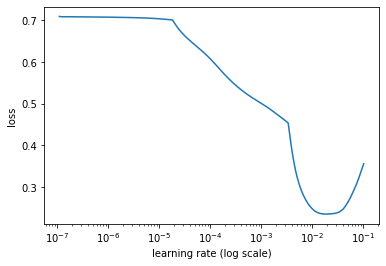

In [ ]:
learner.lr_find()
learner.lr_plot()

In [ ]:
history = learner.autofit(0.005)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.005...
Epoch 1/1024
525/525 [==============================] - 91s 108ms/step - loss: 0.3405 - accuracy: 0.6161 - val_loss: 0.1868 - val_accuracy: 0.7702
Epoch 2/1024
525/525 [==============================] - 60s 114ms/step - loss: 0.1451 - accuracy: 0.7959 - val_loss: 0.1802 - val_accuracy: 0.7466
Epoch 3/1024
525/525 [==============================] - 55s 104ms/step - loss: 0.0979 - accuracy: 0.8275 - val_loss: 0.1998 - val_accuracy: 0.7552
Epoch 4/1024
525/525 [==============================] - 55s 104ms/step - loss: 0.0597 - accuracy: 0.8489 - val_loss: 0.2308 - val_accuracy: 0.7416

Epoch 00004: Reducing Max LR on Plateau: new max lr will be 0.0025 (if not early_stopping).
Epoch 5/1024
525/525 [==============================] - 55s 105ms/step - loss: 0.0339 - accuracy: 0.8532 - val_loss: 0.2787 - val_accur

In [ ]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [ ]:
filepath='/content/drive/MyDrive/Capstone - Multi Label Classification on Research Articles/models/biGRU'
predictor.save(filepath)

In [ ]:
# load saved model to skip training
filepath='/content/drive/MyDrive/Capstone - Multi Label Classification on Research Articles/models/biGRU'
predictor = ktrain.load_predictor(filepath)

In [ ]:
# code snippet adapted from 'https://github.com/adam0ling/twitter_sentiment'

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='train acc')
    plt.plot(x, val_acc, 'r', label='val acc')
    plt.title('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='train loss')
    plt.plot(x, val_loss, 'r', label='val loss')
    plt.title('Loss')
    plt.legend()

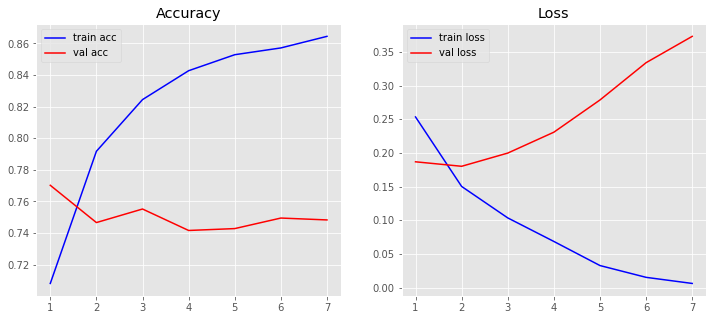

In [ ]:
plot_history(history)

In [ ]:
y_pred = predictor.predict(test_df['merged'].values)

In [ ]:
y_pred[:3]

[[('Computer Science', 0.89260334),
  ('Physics', 0.0029053688),
  ('Mathematics', 0.004407823),
  ('Statistics', 0.6465516),
  ('Quantitative Biology', 0.0072108507),
  ('Quantitative Finance', 0.00066813827)],
 [('Computer Science', 0.28175443),
  ('Physics', 0.2819124),
  ('Mathematics', 0.05576545),
  ('Statistics', 0.23351237),
  ('Quantitative Biology', 0.08603662),
  ('Quantitative Finance', 0.012316912)],
 [('Computer Science', 0.9848641),
  ('Physics', 0.004002601),
  ('Mathematics', 0.09579703),
  ('Statistics', 0.026726633),
  ('Quantitative Biology', 0.0034461021),
  ('Quantitative Finance', 0.0018265247)]]

In [ ]:
# extract probability from each tuple and round off to get prediction as integer
temp = []
for row in y_pred:
    arr = []
    for tup in row:
      arr.append(tup[1])
    temp.append(arr) 

y_pred = np.array(temp).round().astype(int)

In [ ]:
print(classification_report(y_test, y_pred, target_names=classes, digits=3))
print('hamming loss : {} \n'.format(hamming_loss(y_test, y_pred)))

                      precision    recall  f1-score   support

    Computer Science      0.840     0.828     0.834      1692
             Physics      0.905     0.855     0.879      1226
         Mathematics      0.899     0.738     0.811      1150
          Statistics      0.776     0.785     0.780      1069
Quantitative Biology      0.630     0.418     0.502       122
Quantitative Finance      0.889     0.356     0.508        45

           micro avg      0.849     0.793     0.820      5304
           macro avg      0.823     0.663     0.719      5304
        weighted avg      0.851     0.793     0.818      5304
         samples avg      0.850     0.831     0.822      5304

hamming loss : 0.0733015494636472 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
